# Compares the outputs of loadSNIDlnw() and loadSN() on .lnw and .txt files of SN2004gt

In [2]:
import SNIDsn
import SNIDdataset
import numpy as np

#### Initializes SNID objects, where loadSNIDlnw() will be used on sn04gtlnw and loadSN() will be used on sn04gtSN

In [3]:
sn04gtlnw = SNIDsn.SNIDsn()
sn04gtSN = SNIDsn.SNIDsn()

#### Uses loadSNIDlnw() and loadSN() for each object

In [4]:
sn04gtlnw.loadSNIDlnw('Tutorial_Data/sn2004gt.lnw')
sn04gtSN.loadSN('Tutorial_Data/test_template.txt', 0, 3, 2, "Ic-norm", "sn2004gt", 0)

#### Both objects have the same headers after they are each loaded (the wavelength start and end differ slightly as loadSNIDlnw() just outputs the minimum and maximum wavelengths while loadSN() outputs the true start and end wavelength)

In [5]:
sn04gtlnw.header

{'Nspec': 13,
 'Nbins': 1024,
 'WvlStart': 2500.0,
 'WvlEnd': 10000.0,
 'SplineKnots': 10,
 'SN': 'sn2004gt',
 'dm15': -9.99,
 'TypeStr': 'Ic-norm',
 'TypeInt': 3,
 'SubTypeInt': 2}

In [6]:
sn04gtSN.header

{'Nspec': 13,
 'Nbins': 1024,
 'WvlStart': 2501.69,
 'WvlEnd': 9993.24,
 'SN': 'sn2004gt',
 'TypeStr': 'Ic-norm',
 'TypeInt': 3,
 'SubTypeInt': 2}

#### Both objects have the same phases after they are each loaded 

In [7]:
sn04gtlnw.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 167.6, 186.5])

In [8]:
sn04gtSN.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 167.6, 186.5])

#### Both objects have the same column names

In [12]:
print(sn04gtlnw.data.dtype.names)
print(sn04gtlnw.getSNCols())

('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')
('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')


In [13]:
print(sn04gtSN.data.dtype.names)
print(sn04gtSN.getSNCols())

('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')
('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')


#### Both objects can use column names to get spectra at specific phases

In [10]:
speclnw = sn04gtlnw.data['Ph16.4']
specSN = sn04gtSN.data['Ph16.4']

#### Both objects can have their wavelengths filtered within the same range, and both of the filtered spectra arrays have the same shape

In [15]:
sn04gtlnw.wavelengthFilter(wvlmin=4000, wvlmax=7000)
print(sn04gtlnw.wavelengths.shape)
print(sn04gtlnw.data.shape)

(414,)
(414,)


In [16]:
sn04gtSN.wavelengthFilter(wvlmin=4000, wvlmax=7000)
print(sn04gtSN.wavelengths.shape)
print(sn04gtSN.data.shape)

(414,)
(414,)


#### Both objects can have the 0.0 placeholder be replaced by np.nan

In [17]:
sn04gtlnw.snidNAN()
sn04gtSN.snidNAN()

#### Removes specified column from both objects

In [18]:
sn04gtlnw.removeSpecCol('Ph167.6')
sn04gtSN.removeSpecCol('Ph167.6')

#### Phases for both objects are the same after the column is removed

In [19]:
sn04gtlnw.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 186.5])

In [20]:
sn04gtSN.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 186.5])

#### Both objects have the same wavelength ranges of NaN gaps in a spectrum 

In [21]:
sn04gtlnw.findGaps('Ph19.4')

[(6031.16, 6031.16), (6298.19, 6298.19), (6766.7, 6766.7)]

In [22]:
sn04gtSN.findGaps('Ph19.4')

[(6031.16, 6031.16), (6298.19, 6298.19), (6766.7, 6766.7)]

#### Both objects have the same interpolation range

In [23]:
sn04gtlnw.getInterpRange(minwvl=4996.62, maxwvl=6006.72, phase='Ph19.4')

(4996.62, 6006.72)

In [24]:
sn04gtSN.getInterpRange(minwvl=4996.62, maxwvl=6006.72, phase='Ph19.4')

(4996.62, 6006.72)

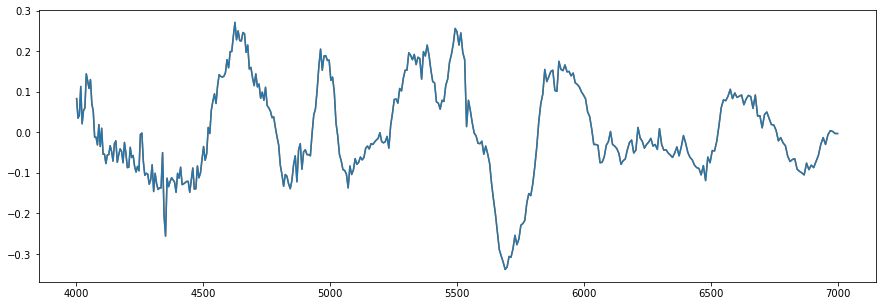

In [26]:
f_lnw = sn04gtlnw.interp1dSpec('Ph16.4', 4000, 7000, True)

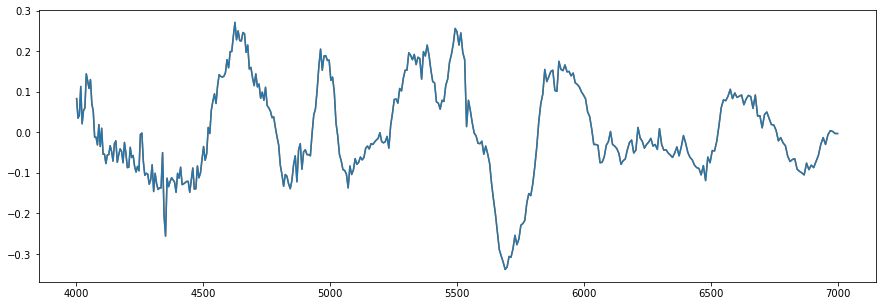

In [27]:
f_SN = sn04gtSN.interp1dSpec('Ph16.4', 4000, 7000, True)

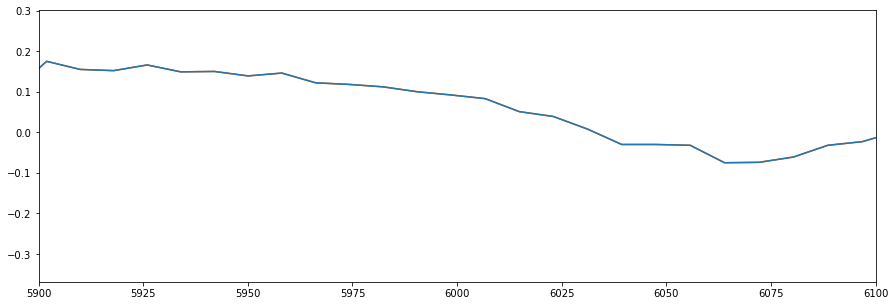

In [28]:
a_lnw = f_lnw.axes[0]
a_lnw.set_xlim((5900, 6100))
f_lnw

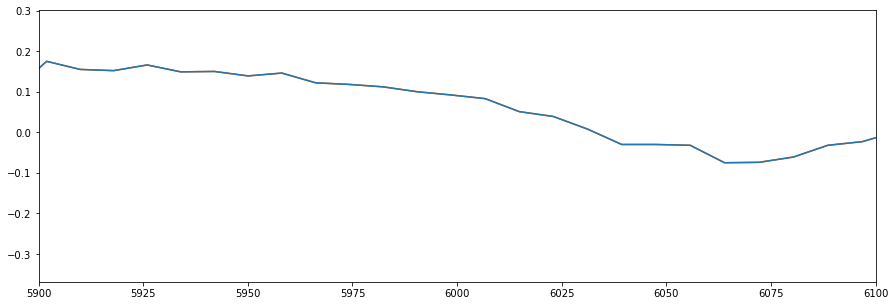

In [29]:
a_SN = f_SN.axes[0]
a_SN.set_xlim((5900, 6100))
f_SN

In [30]:
sn04gtlnw.header['TypeStr']

'Ic-norm'

In [31]:
sn04gtSN.header['TypeStr']

'Ic-norm'

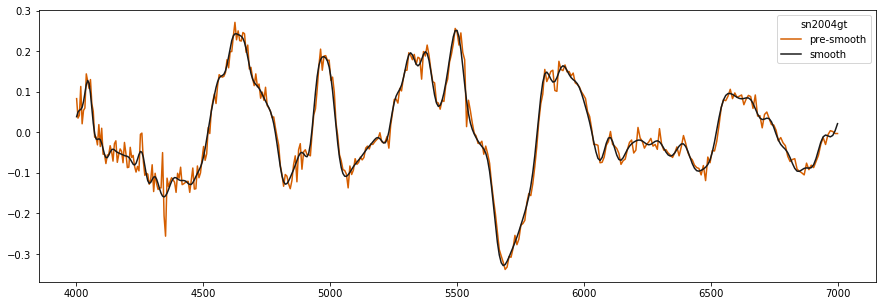

In [32]:
f_lnw=sn04gtlnw.smoothSpectrum('Ph16.4', velcut=1000, plot=True)

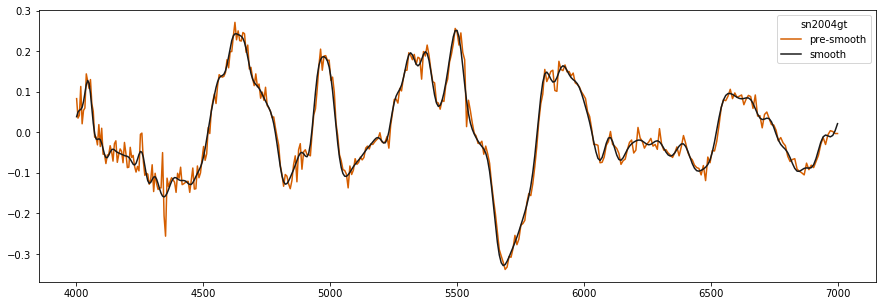

In [33]:
f_SN=sn04gtSN.smoothSpectrum('Ph16.4', velcut=1000, plot=True)

In [34]:
sn04gtlnw.save('Tutorial_Data/')

In [35]:
sn04gtSN.save('Tutorial_Data/')